In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifierfrom sklearn.ensemble import AdaBoostClassifierfrom sklearn.metrics import accuracy_score, roc_auc_score


In [10]:
file_path = "breastCancer.csv"
df = pd.read_csv(file_path)
print(df.head())


        id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7    

In [11]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print(X)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

[[-1.44798723 -0.45602336 -1.36665103 ...  0.91959172  2.14719008
   1.85943247]
 [ 1.97750799  1.69418666  2.08961867 ...  2.6752184   1.9368786
   2.46346488]
 [-1.40708919 -1.26351565 -1.34976305 ... -0.97048581  0.61676962
   0.05287682]
 ...
 [ 0.04621146 -0.57470379 -0.06874782 ... -1.23756033 -0.71628161
  -1.26047806]
 [-0.04183295  0.07687501 -0.03497186 ...  1.03683652  0.45013821
   1.19444266]
 [-0.5530585   0.28631105 -0.60751564 ... -0.61357437 -0.33448538
  -0.84042616]] [[-0.47069438 -0.16048584 -0.44810956 ... -0.19956318  0.18320441
   0.19695794]
 [ 1.36687747  0.47014935  1.30288585 ...  0.97897545 -0.56582801
  -1.00057787]
 [ 0.37850807  0.04429607  0.40082046 ...  0.56024403 -0.10314275
  -0.20813168]
 ...
 [-0.74050787 -1.01451947 -0.74550281 ... -0.28209134 -0.3830188
  -0.3245049 ]
 [ 0.02633046  1.99205126  0.02393013 ... -0.49358878 -1.63518099
  -0.33170895]
 [ 1.87526288  2.75300221  1.80128727 ...  0.78102969 -0.05299156
  -0.0978542 ]] [1 0 1 1 1 0 1 1 1

In [16]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1, random_state=42)

In [19]:

adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

In [30]:
y_pred_base = base_model.predict(X_test)
y_pred_adaboost = adaboost_model.predict(X_test)
print(y_pred_base)
print(y_pred_adaboost)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [27]:
base_accuracy = accuracy_score(y_test, y_pred_base)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)

base_auc = roc_auc_score(y_test, y_pred_base)
adaboost_auc = roc_auc_score(y_test, y_pred_adaboost)

In [28]:
print("base_accuracy:",base_accuracy)

base_accuracy: 0.8947368421052632


In [31]:
print("adaboost_accuracy :",adaboost_accuracy )

adaboost_accuracy : 0.9649122807017544


In [33]:
print("base_auc :",base_auc )
print("adaboost_auc :",adaboost_auc )

base_auc : 0.8971503439240094
adaboost_auc : 0.9580740255486406


In [40]:
comparison_df = pd.DataFrame({
    "Model"   : ["Decision Tree (Depth=1)", "AdaBoost (50 Estimators)"],
    "Accuracy": [base_accuracy,adaboost_accuracy],
    "ROC-AUC" : [base_auc,adaboost_auc]
})
print("comparison_df:",comparison_df)

comparison_df:                       Model  Accuracy   ROC-AUC
0   Decision Tree (Depth=1)  0.894737  0.897150
1  AdaBoost (50 Estimators)  0.964912  0.958074


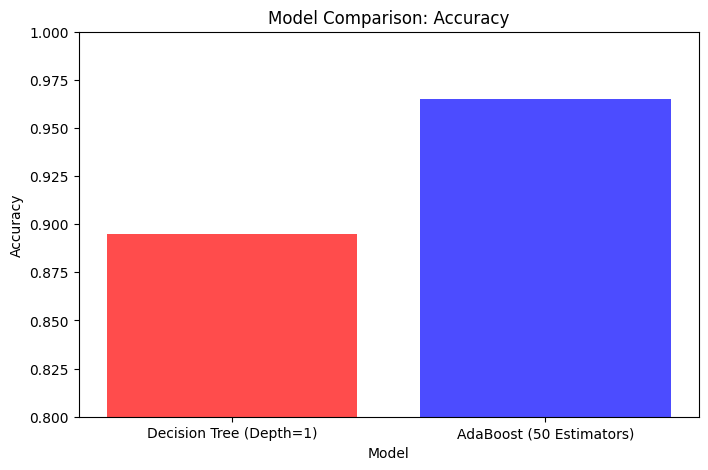

In [41]:
plt.figure(figsize=(8, 5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], color=["red", "blue"], alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy")
plt.ylim(0.8, 1.0)
plt.show()


In [42]:
print(comparison_df)


                      Model  Accuracy   ROC-AUC
0   Decision Tree (Depth=1)  0.894737  0.897150
1  AdaBoost (50 Estimators)  0.964912  0.958074
